In [1]:
import pandas as pd

ion = pd.read_csv('ion.csv', index_col=0)

df = ion.copy()
df['label'] = df['label'].map({'g': 0, 'b': 1})
df.drop('feature2', axis=1, inplace=True)
display(df.head())

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('label', axis=1)
X_valid = df_valid.drop('label', axis=1)
y_train = df_train['label']
y_valid = df_valid['label']

,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
feature1,,,,,,,,,,,,,,,,,,,,,
1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [12]:
print(len(df.columns))

33


In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[32]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [14]:
model.compile(
     optimizer='adam',
     loss='binary_crossentropy',
     metrics=['binary_accuracy'])

In [15]:
early_stopping= keras.callbacks.EarlyStopping(
               patience= 10,
               min_delta= 0.001,
               restore_best_weights=True)

In [16]:
pred = model.fit(
        X_train,y_train,
        validation_data=(X_valid, y_valid),
        batch_size=512,
        epochs=1000,
        callbacks=[early_stopping],
        verbose=0)

<AxesSubplot:>

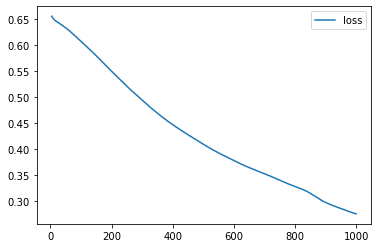

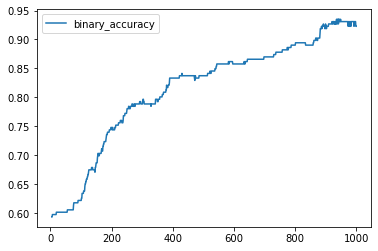

In [24]:
history_df = pd.DataFrame(pred.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss']].plot()
history_df.loc[5:, ['binary_accuracy']].plot()
